# Coefficient for Gambler's Ruin probability on exact time

In [1]:
from math import sqrt
from scipy.special import binom
from math import factorial
import numpy as np
################
catalan = lambda t : (1 / (t+1)) * binom(2*t, t)
################
#c = lambda b, t : int(max(0, binom(t+b, b) - binom(t+b, b-1)))
#c = lambda b, t : int(max(0, binom(t+2*b, b) - binom(t+2*b, b-1)))
#c = lambda b, t : int(max(0, binom(b+2*t, t) - binom(b+2*t, t-1)))
#c = lambda b, t : int(max(0, binom((b-1)+2*(t-1), t-1) - binom((b-1)+2*(t-1), t-2)))
c = lambda b, t : int(max(0, binom((b-1)+2*(t-b-1), t-b-1) - binom((b-1)+2*(t-b-1), t-b-2)))
#c = lambda b, t : max(0, binom(b+(2*(t-1)), t-1) - binom(b+(2*(t-1)), t-2)) #if (b%t)==0 else 0
#c = lambda b, t : max(0, binom(b+2*(t-b-1), t-b-1) - binom(b+2*(t-b-1), t-b-2)) #if (b%t)==0 else 0
################
b_arr = range(10)
t_arr = range(20)
c_arr = np.zeros((10,20), dtype='int')
for b in b_arr:
  for t in t_arr:
    c_arr[b][t] = c(b, t)
np.set_printoptions(linewidth=450)
print(c_arr)


[[        0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0]
 [        0         0         1         1         2         5        14        42       132       429      1430      4862     16796     58786    208012    742900   2674440   9694845  35357670 129644790]
 [        0         0         0         1         2         5        14        42       132       429      1430      4862     16796     58786    208012    742900   2674440   9694845  35357670 129644789]
 [        0         0         0         0         1         3         9        28        90       297      1001      3432     11934     41990    149226    534888   1931540   7020405  25662825  94287120]
 [        0         0         0         0         0         1         4        14        48       165       572      2002      7072     25194     90440    326876   1188640   4345965  15967

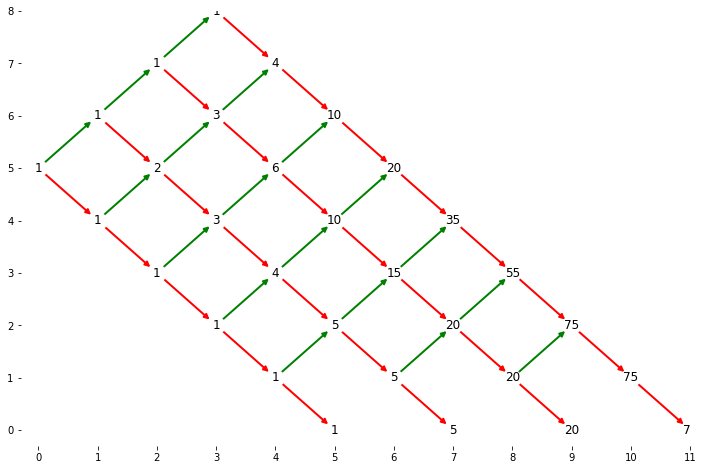

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

fig, ax = plt.subplots(figsize=(12,8))

t_max = 11
b_0 = 5

b_max = (b_0 + t_max) // 2

up_steps = b_max - b_0
dw_steps = t_max - up_steps

G = nx.DiGraph()

pos={}
labels={}

for i in range(0, up_steps+1):
  for j in range(0, dw_steps+1):
    t = j + i
    b = b_0 + i - j
    if (b >= 0):
      G.add_node(f'({t},{b})', pos=(t,b))
      pos[f'({t},{b})'] = (t,b)
    if (i > 0) and (b > 1):
      G.add_edge(f'({t-1},{b-1})', f'({t},{b})', color='g', weight=2, style='solid')
    if (j > 0) and (b >= 0):
      G.add_edge(f'({t-1},{b+1})', f'({t},{b})', color='r', weight=2, style='dotted')

node = f'({0},{b_0})'
G.nodes[node]['catalan_value'] = 1
labels[node] = 1

for t in range(1, t_max+1):
  for b in range(0, b_max+1):
    node = f'({t},{b})'
    if node in G:
      s = 0
      for pred in G.predecessors(node):
        s += G.nodes[pred]['catalan_value']
        G.nodes[node]['catalan_value'] = s
        labels[node] = s

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]
styles = [G[u][v]['style'] for u,v in edges]

nx.draw_networkx_nodes(G, pos, labels, node_color='w')
nx.draw_networkx_edges(G, pos, edge_color=colors, width=weights) #, style=styles)
nx.draw_networkx_labels(G, pos, labels) #font_size=16

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

plt.xticks(range(0, t_max+1))
plt.yticks(range(0, b_max+1))

ax.set_xlim(-0.3, t_max+0.)
ax.set_ylim(-0.3, b_max)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.7)

plt.show()

